In [35]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd
import pickle

In [2]:
chess_img = cv2.imread("chess.png")
chess_img = chess_img[:, :, [2, 1, 0]]

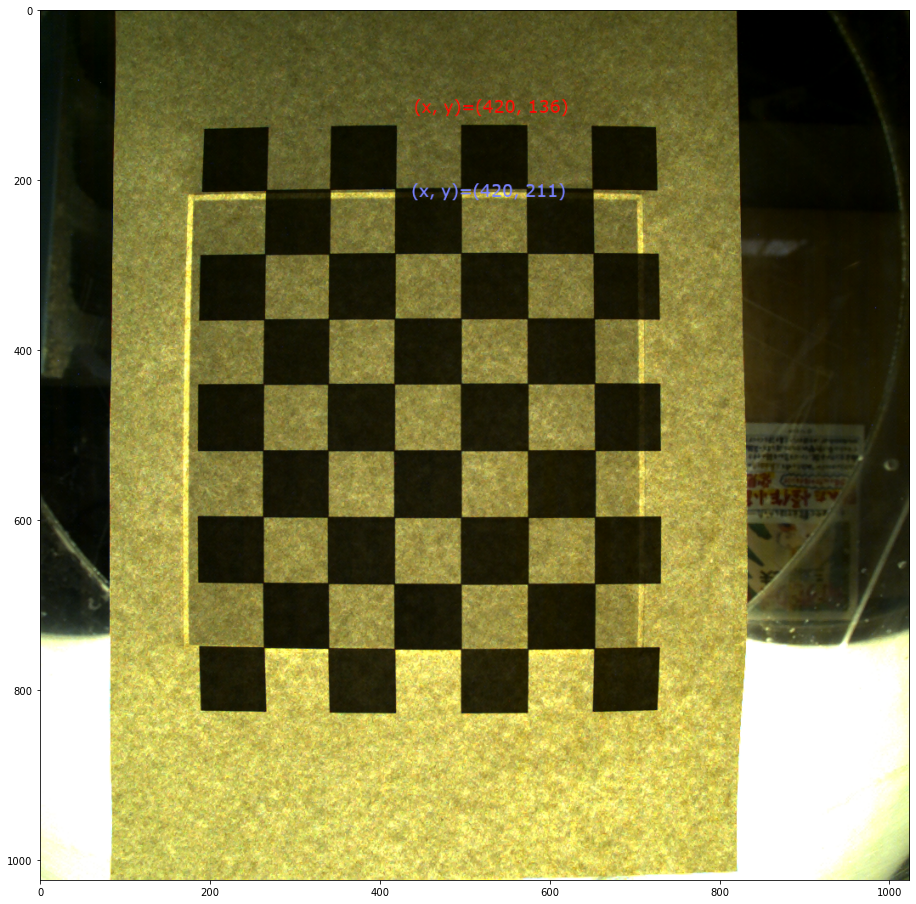

In [3]:
plt.figure(figsize=(16, 16))
plt.imshow(chess_img)
plt.show()

In [4]:
from_red_to_blue_mm = 21.5
from_red_to_blue_px = 211 - 136

mm2px = from_red_to_blue_px / from_red_to_blue_mm
px2mm = 1 / mm2px

In [5]:
from_origin_to_red_mm = 57.5  # mm
from_origin_to_red_px = from_origin_to_red_mm * mm2px

origin_x = 420
origin_y = 136 - from_origin_to_red_px

print(origin_x, origin_y)

420 -64.58139534883722


In [6]:
20 * px2mm * 50

286.6666666666667

In [7]:
fps = 50

In [8]:
res1 = np.zeros((1, 4))
res2 = np.zeros((1, 4))
res3 = np.zeros((1, 4))

In [9]:
for c in range(1, 11):
    for t in range(6, 10000):
        try:
            tmp = np.loadtxt(f"/Users/loblium/data/r/nearest_skip_5/rbi_q_1/{c}/{t:06}.csv", delimiter=",", skiprows=1)
        except OSError:
            continue
        if tmp.ndim == 1:
            if len(tmp) > 0:
                tmp = tmp[np.newaxis, :]
            else:
                continue

        tmp[:, 0] += 90
        tmp[:, 1] += 290

        tmp[:, 0] -= origin_x
        tmp[:, 1] -= origin_y
        tmp[:, 2] *= fps
        tmp[:, 3] *= fps
        tmp *= px2mm

        tmp2 = np.zeros_like(tmp)
        tmp2[:, 0] = np.sqrt(tmp[:, 0]**2 + tmp[:, 1]**2)  # r
        tmp2[:, 1] = np.arctan2(tmp[:, 1], tmp[:, 0])  # phi
        tmp2[:, 2] = tmp[:, 2] * np.cos(tmp2[:, 1]) + tmp[:, 3] * np.sin(tmp2[:, 1])  # dv_r
        tmp2[:, 3] = (tmp[:, 2] * np.sin(tmp2[:, 1]) + tmp[:, 3] * np.cos(tmp2[:, 1]))  # dv_theta

        res1 = np.vstack((res1, tmp2))

/Users/loblium/opt/anaconda3/envs/venv/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: loadtxt: Empty input file: "/Users/loblium/data/r/nearest_skip_5/rbi_q_1/1/000478.csv"
  after removing the cwd from sys.path.
/Users/loblium/opt/anaconda3/envs/venv/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: loadtxt: Empty input file: "/Users/loblium/data/r/nearest_skip_5/rbi_q_1/1/000533.csv"
  after removing the cwd from sys.path.
/Users/loblium/opt/anaconda3/envs/venv/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: loadtxt: Empty input file: "/Users/loblium/data/r/nearest_skip_5/rbi_q_1/3/000200.csv"
  after removing the cwd from sys.path.
/Users/loblium/opt/anaconda3/envs/venv/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: loadtxt: Empty input file: "/Users/loblium/data/r/nearest_skip_5/rbi_q_1/4/000320.csv"
  after removing the cwd from sys.path.
/Users/loblium/opt/anaconda3/envs/venv/lib/python3.7/site-packages/ipyke

In [10]:
for c in range(1, 11):
    for t in range(6, 10000):
        try:
            tmp = np.loadtxt(f"/Users/loblium/data/r/nearest_skip_5/rbi_q_2/{c}/{t:06}.csv", delimiter=",", skiprows=1)
        except OSError:
            continue
        if tmp.ndim == 1:
            if len(tmp) > 0:
                tmp = tmp[np.newaxis, :]
            else:
                continue

        tmp[:, 0] += 90
        tmp[:, 1] += 290

        tmp[:, 0] -= origin_x
        tmp[:, 1] -= origin_y
        tmp[:, 2] *= fps
        tmp[:, 3] *= fps
        tmp *= px2mm

        tmp2 = np.zeros_like(tmp)
        tmp2[:, 0] = np.sqrt(tmp[:, 0]**2 + tmp[:, 1]**2)  # r
        tmp2[:, 1] = np.arctan2(tmp[:, 1], tmp[:, 0])  # phi
        tmp2[:, 2] = tmp[:, 2] * np.cos(tmp2[:, 1]) + tmp[:, 3] * np.sin(tmp2[:, 1])  # dv_r
        tmp2[:, 3] = (tmp[:, 2] * np.sin(tmp2[:, 1]) + tmp[:, 3] * np.cos(tmp2[:, 1]))  # dv_theta

        res2 = np.vstack((res2, tmp2))

/Users/loblium/opt/anaconda3/envs/venv/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: loadtxt: Empty input file: "/Users/loblium/data/r/nearest_skip_5/rbi_q_2/2/000470.csv"
  after removing the cwd from sys.path.
/Users/loblium/opt/anaconda3/envs/venv/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: loadtxt: Empty input file: "/Users/loblium/data/r/nearest_skip_5/rbi_q_2/2/000502.csv"
  after removing the cwd from sys.path.
/Users/loblium/opt/anaconda3/envs/venv/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: loadtxt: Empty input file: "/Users/loblium/data/r/nearest_skip_5/rbi_q_2/5/000186.csv"
  after removing the cwd from sys.path.
/Users/loblium/opt/anaconda3/envs/venv/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: loadtxt: Empty input file: "/Users/loblium/data/r/nearest_skip_5/rbi_q_2/5/000187.csv"
  after removing the cwd from sys.path.
/Users/loblium/opt/anaconda3/envs/venv/lib/python3.7/site-packages/ipyke

In [11]:
for c in range(1, 11):
    for t in range(6, 10000):
        try:
            tmp = np.loadtxt(f"/Users/loblium/data/r/nearest_skip_5/rbi_q_3/{c}/{t:06}.csv", delimiter=",", skiprows=1)
        except OSError:
            continue
        if tmp.ndim == 1:
            if len(tmp) > 0:
                tmp = tmp[np.newaxis, :]
            else:
                continue

        tmp[:, 0] += 90
        tmp[:, 1] += 290

        tmp[:, 0] -= origin_x
        tmp[:, 1] -= origin_y
        tmp[:, 2] *= fps
        tmp[:, 3] *= fps
        tmp *= px2mm

        tmp2 = np.zeros_like(tmp)
        tmp2[:, 0] = np.sqrt(tmp[:, 0]**2 + tmp[:, 1]**2)  # r
        tmp2[:, 1] = np.arctan2(tmp[:, 1], tmp[:, 0])  # phi
        tmp2[:, 2] = tmp[:, 2] * np.cos(tmp2[:, 1]) + tmp[:, 3] * np.sin(tmp2[:, 1])  # dv_r
        tmp2[:, 3] = (tmp[:, 2] * np.sin(tmp2[:, 1]) + tmp[:, 3] * np.cos(tmp2[:, 1]))  # dv_theta

        res3 = np.vstack((res3, tmp2))

/Users/loblium/opt/anaconda3/envs/venv/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: loadtxt: Empty input file: "/Users/loblium/data/r/nearest_skip_5/rbi_q_3/3/007129.csv"
  after removing the cwd from sys.path.
/Users/loblium/opt/anaconda3/envs/venv/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: loadtxt: Empty input file: "/Users/loblium/data/r/nearest_skip_5/rbi_q_3/3/007130.csv"
  after removing the cwd from sys.path.
/Users/loblium/opt/anaconda3/envs/venv/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: loadtxt: Empty input file: "/Users/loblium/data/r/nearest_skip_5/rbi_q_3/4/006748.csv"
  after removing the cwd from sys.path.
/Users/loblium/opt/anaconda3/envs/venv/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: loadtxt: Empty input file: "/Users/loblium/data/r/nearest_skip_5/rbi_q_3/4/006750.csv"
  after removing the cwd from sys.path.
/Users/loblium/opt/anaconda3/envs/venv/lib/python3.7/site-packages/ipyke

In [12]:
res1 = res1[1:]
res2 = res2[1:]
res3 = res3[1:]

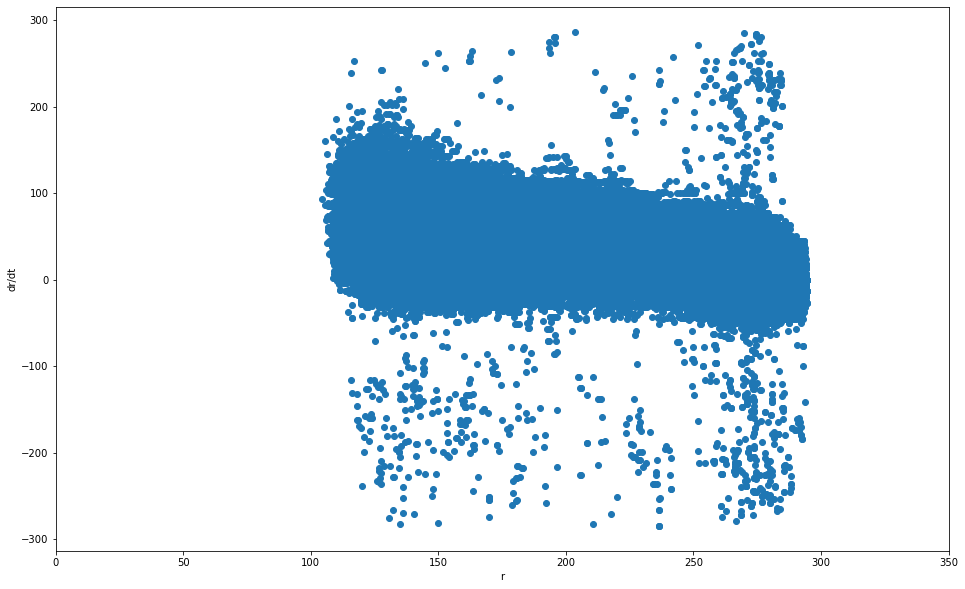

In [13]:
fig, ax = plt.subplots(figsize=(16, 10))
plt.xlabel("r")
plt.ylabel("dr/dt")
plt.xlim(0, 350)
ax.scatter(res1[:, 0], res1[:, 2], zorder=1)
plt.show()

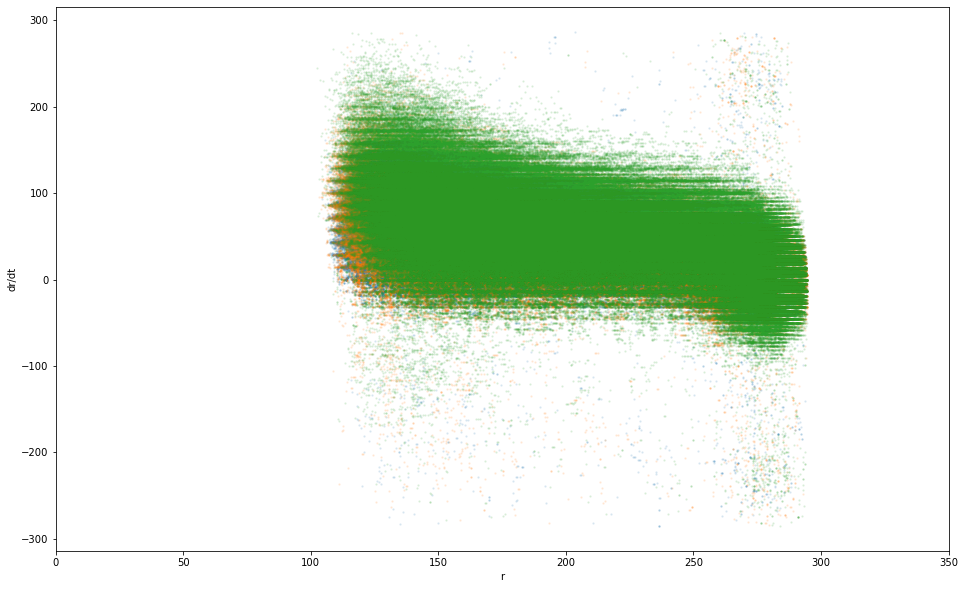

In [14]:
fig, ax = plt.subplots(figsize=(16, 10))
plt.xlabel("r")
plt.ylabel("dr/dt")
plt.xlim(0, 350)
ax.scatter(res1[:, 0], res1[:, 2], s=2, alpha=0.1, zorder=1)
ax.scatter(res2[:, 0], res2[:, 2], s=2, alpha=0.1, zorder=2)
ax.scatter(res3[:, 0], res3[:, 2], s=2, alpha=0.1, zorder=3)
plt.show()

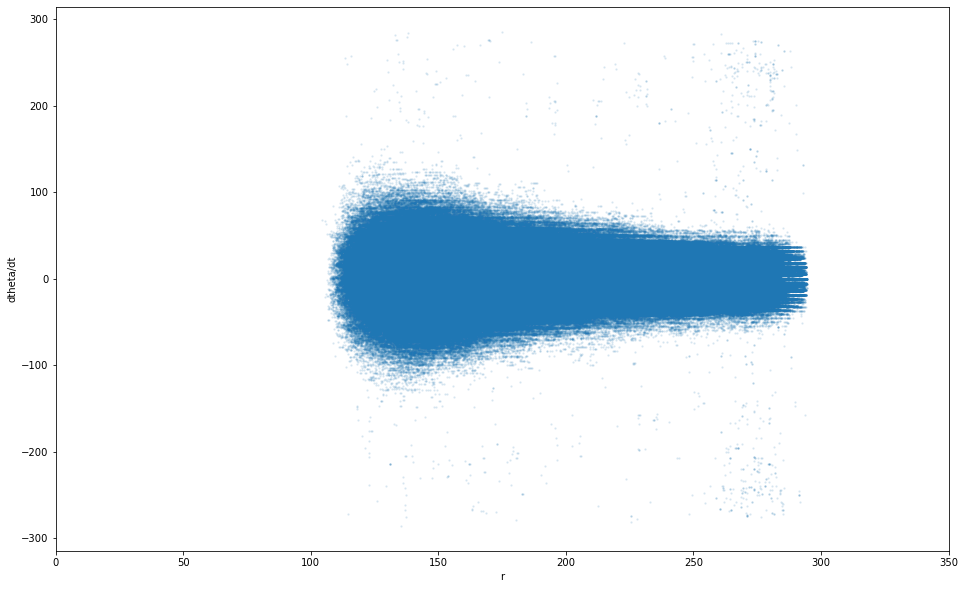

In [15]:
fig, ax = plt.subplots(figsize=(16, 10))
plt.xlabel("r")
plt.ylabel("dtheta/dt")
plt.xlim(0, 350)
ax.scatter(res1[:, 0], res1[:, 3], s=2, alpha=0.1, zorder=1)
plt.show()

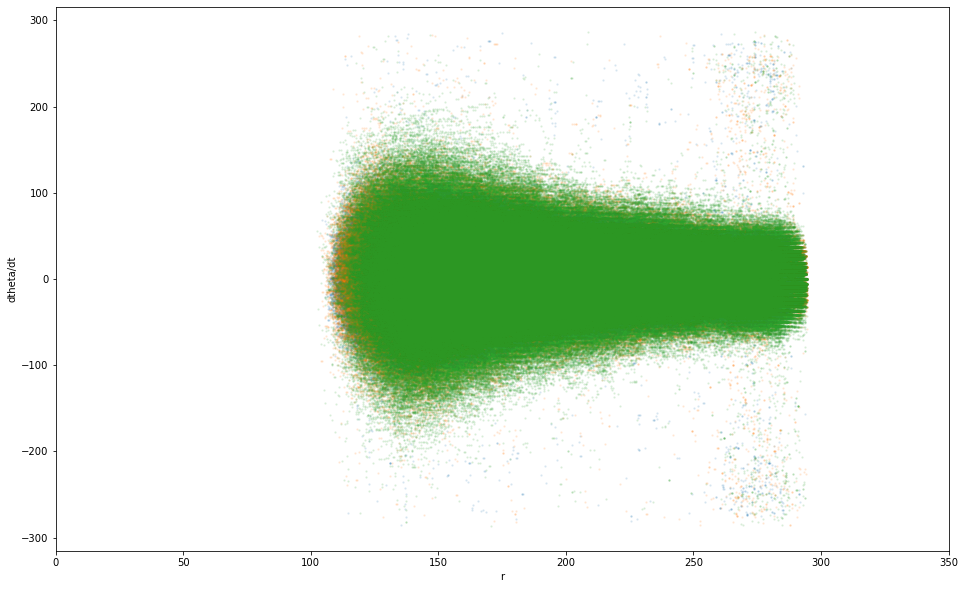

In [16]:
fig, ax = plt.subplots(figsize=(16, 10))
plt.xlabel("r")
plt.ylabel("dtheta/dt")
plt.xlim(0, 350)
ax.scatter(res1[:, 0], res1[:, 3], s=2, alpha=0.1, zorder=1)
ax.scatter(res2[:, 0], res2[:, 3], s=2, alpha=0.1, zorder=2)
ax.scatter(res3[:, 0], res3[:, 3], s=2, alpha=0.1, zorder=3)
plt.show()

In [17]:
columns = ['r', 'theta', 'u_r', 'u_theta']
res1_sort = pd.DataFrame(data=res1, columns=columns, dtype='float').sort_values(by='r', ascending=True).values
res2_sort = pd.DataFrame(data=res2, columns=columns, dtype='float').sort_values(by='r', ascending=True).values
res3_sort = pd.DataFrame(data=res3, columns=columns, dtype='float').sort_values(by='r', ascending=True).values

In [18]:
r_ur_err_1 = np.zeros((3501, 3))
r_ur_err_2 = np.zeros((3501, 3))
r_ur_err_3 = np.zeros((3501, 3))

In [19]:
_iter = 50

In [20]:
for i in tqdm(range(0, 3501, _iter)):
    res1_sort_l = res1_sort[np.where(res1_sort[:, 0] >= i/10)]
    res1_sort_lr = res1_sort_l[np.where(res1_sort_l[:, 0] < (i+_iter)/10)]
    r_ur_err_1[i, 0] = i
    r_ur_err_1[i, 1] = np.mean(res1_sort_lr, axis=0)[2]
    r_ur_err_1[i, 2] = np.std(res1_sort_lr, axis=0)[2]

  0%|          | 0/71 [00:00<?, ?it/s]/Users/loblium/opt/anaconda3/envs/venv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/loblium/opt/anaconda3/envs/venv/lib/python3.7/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/Users/loblium/opt/anaconda3/envs/venv/lib/python3.7/site-packages/numpy/core/_methods.py:263: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims, where=where)
/Users/loblium/opt/anaconda3/envs/venv/lib/python3.7/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in true_divide
  subok=False)
/Users/loblium/opt/anaconda3/envs/venv/lib/python3.7/site-packages/numpy/core/_methods.py:252: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
100%|██████████| 71/71 [00:02<00:00, 33.37it/

In [21]:
for i in tqdm(range(0, 3501, _iter)):
    res2_sort_l = res2_sort[np.where(res2_sort[:, 0] >= i/10)]
    res2_sort_lr = res2_sort_l[np.where(res2_sort_l[:, 0] < (i+_iter)/10)]
    r_ur_err_2[i, 0] = i
    r_ur_err_2[i, 1] = np.mean(res2_sort_lr, axis=0)[2]
    r_ur_err_2[i, 2] = np.std(res2_sort_lr, axis=0)[2]

100%|██████████| 71/71 [00:01<00:00, 40.16it/s]


In [22]:
for i in tqdm(range(0, 3501, _iter)):
    res3_sort_l = res3_sort[np.where(res3_sort[:, 0] >= i/10)]
    res3_sort_lr = res3_sort_l[np.where(res3_sort_l[:, 0] < (i+_iter)/10)]
    r_ur_err_3[i, 0] = i
    r_ur_err_3[i, 1] = np.mean(res3_sort_lr, axis=0)[2]
    r_ur_err_3[i, 2] = np.std(res3_sort_lr, axis=0)[2]

100%|██████████| 71/71 [00:01<00:00, 59.07it/s]


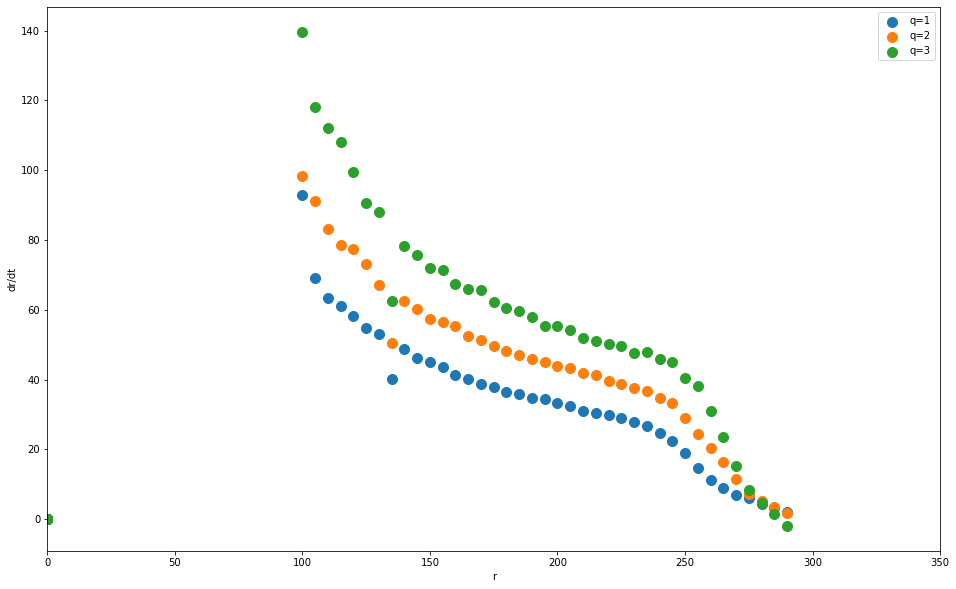

In [23]:
fig, ax = plt.subplots(figsize=(16, 10))
plt.xlabel("r")
plt.ylabel("dr/dt")
plt.xlim(0, 350)

ax.scatter(r_ur_err_1[:, 0]/10, r_ur_err_1[:, 1], s=100, label="q=1")
ax.scatter(r_ur_err_2[:, 0]/10, r_ur_err_2[:, 1], s=100, label="q=2")
ax.scatter(r_ur_err_3[:, 0]/10, r_ur_err_3[:, 1], s=100, label="q=3")

plt.legend()

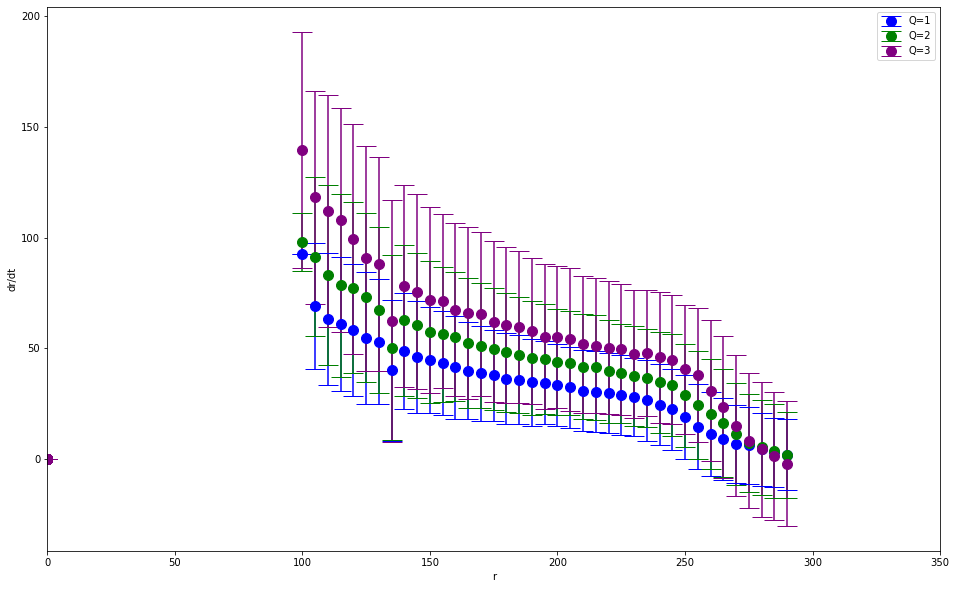

In [24]:
fig, ax = plt.subplots(figsize=(16, 10))
plt.xlabel("r")
plt.ylabel("dr/dt")
plt.xlim(0, 350)

ax.errorbar(r_ur_err_1[:, 0]/10, r_ur_err_1[:, 1], yerr=r_ur_err_1[:, 2], capsize=10, fmt='o', markersize=10, ecolor='b', markeredgecolor="b", color='b', label="Q=1")
ax.errorbar(r_ur_err_2[:, 0]/10, r_ur_err_2[:, 1], yerr=r_ur_err_2[:, 2], capsize=10, fmt='o', markersize=10, ecolor='g', markeredgecolor="g", color='g', label="Q=2")
ax.errorbar(r_ur_err_3[:, 0]/10, r_ur_err_3[:, 1], yerr=r_ur_err_3[:, 2], capsize=10, fmt='o', markersize=10, ecolor='purple', markeredgecolor="purple", color='purple', label="Q=3")

plt.legend()

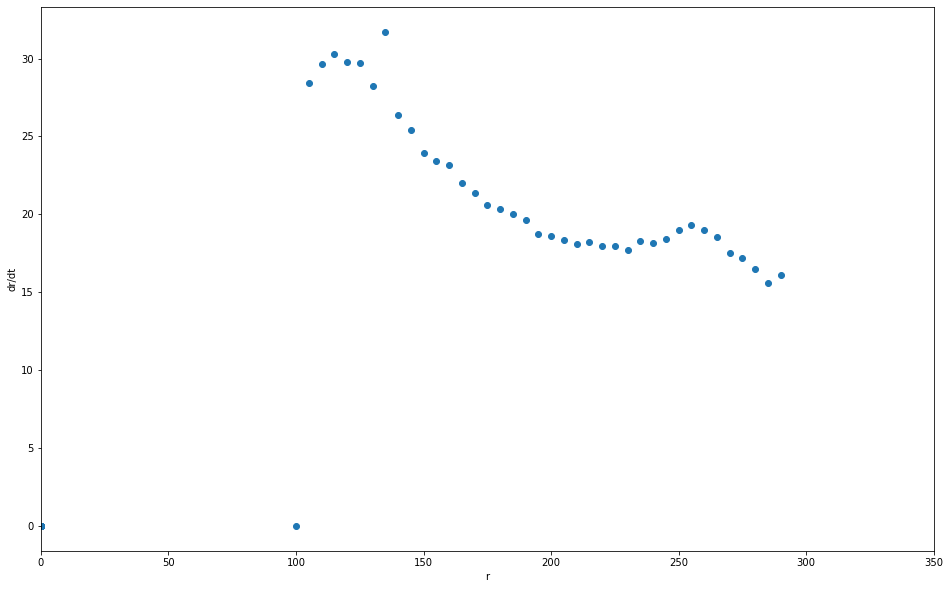

In [25]:
fig, ax = plt.subplots(figsize=(16, 10))
plt.xlabel("r")
plt.ylabel("dr/dt")
plt.xlim(0, 350)
ax.scatter(r_ur_err_1[:, 0]/10, r_ur_err_1[:, 2])

In [26]:
r_ur_in_1 = np.zeros((1, 2))
r_ur_in_2 = np.zeros((1, 2))
r_ur_in_3 = np.zeros((1, 2))

r_ur_urErr_1 = np.zeros((3501, 3))
r_ur_urErr_2 = np.zeros((3501, 3))
r_ur_urErr_3 = np.zeros((3501, 3))

r_ur_in_1[:, :] = np.nan
r_ur_in_2[:, :] = np.nan
r_ur_in_3[:, :] = np.nan

r_ur_urErr_1[:, :] = np.nan
r_ur_urErr_2[:, :] = np.nan
r_ur_urErr_3[:, :] = np.nan

In [27]:
for i in tqdm(range(0, 3501, 50)):
    res1_sort_l = res1_sort[np.where(res1_sort[:, 0] >= i/10)]
    res1_sort_lr = res1_sort_l[np.where(res1_sort_l[:, 0] < (i+_iter)/10)]

    columns = ['r', 'theta', 'u_r', 'u_theta']
    df = pd.DataFrame(data=res1_sort_lr, columns=columns, dtype='float')

    q1 = df['u_r'].quantile(0.25)
    q2 = df['u_r'].quantile(0.75)
    iqr = q2 - q1

    upper = q2 + 1.5 * iqr
    bottom = q1 - 1.5 * iqr
    _in = df[(df['u_r'] >= bottom) & (df['u_r'] <= upper)].values
    tmp = np.array([_in[:, 0], _in[:, 2]]).T
    r_ur_in_1 = np.vstack([r_ur_in_1, tmp])

    r_ur_urErr_1[i, 0] = i
    r_ur_urErr_1[i, 1] = np.mean(tmp, axis=0)[1]
    r_ur_urErr_1[i, 2] = np.std(tmp, axis=0)[1]

  0%|          | 0/71 [00:00<?, ?it/s]/Users/loblium/opt/anaconda3/envs/venv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/loblium/opt/anaconda3/envs/venv/lib/python3.7/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/Users/loblium/opt/anaconda3/envs/venv/lib/python3.7/site-packages/numpy/core/_methods.py:263: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims, where=where)
/Users/loblium/opt/anaconda3/envs/venv/lib/python3.7/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in true_divide
  subok=False)
/Users/loblium/opt/anaconda3/envs/venv/lib/python3.7/site-packages/numpy/core/_methods.py:252: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
100%|██████████| 71/71 [00:02<00:00, 31.85it/

In [28]:
for i in tqdm(range(0, 3501, 50)):
    res2_sort_l = res2_sort[np.where(res2_sort[:, 0] >= i/10)]
    res2_sort_lr = res2_sort_l[np.where(res2_sort_l[:, 0] < (i+_iter)/10)]

    columns = ['r', 'theta', 'u_r', 'u_theta']
    df = pd.DataFrame(data=res2_sort_lr, columns=columns, dtype='float')

    q1 = df['u_r'].quantile(0.25)
    q2 = df['u_r'].quantile(0.75)
    iqr = q2 - q1

    upper = q2 + 1.5 * iqr
    bottom = q1 - 1.5 * iqr
    _in = df[(df['u_r'] >= bottom) & (df['u_r'] <= upper)].values
    tmp = np.array([_in[:, 0], _in[:, 2]]).T
    r_ur_in_2 = np.vstack([r_ur_in_2, tmp])

    r_ur_urErr_2[i, 0] = i
    r_ur_urErr_2[i, 1] = np.mean(tmp, axis=0)[1]
    r_ur_urErr_2[i, 2] = np.std(tmp, axis=0)[1]

100%|██████████| 71/71 [00:01<00:00, 40.27it/s]


In [29]:
for i in tqdm(range(0, 3501, 50)):
    res3_sort_l = res3_sort[np.where(res3_sort[:, 0] >= i/10)]
    res3_sort_lr = res3_sort_l[np.where(res3_sort_l[:, 0] < (i+_iter)/10)]

    columns = ['r', 'theta', 'u_r', 'u_theta']
    df = pd.DataFrame(data=res3_sort_lr, columns=columns, dtype='float')

    q1 = df['u_r'].quantile(0.25)
    q2 = df['u_r'].quantile(0.75)
    iqr = q2 - q1

    upper = q2 + 1.5 * iqr
    bottom = q1 - 1.5 * iqr
    _in = df[(df['u_r'] >= bottom) & (df['u_r'] <= upper)].values
    tmp = np.array([_in[:, 0], _in[:, 2]]).T
    r_ur_in_3 = np.vstack([r_ur_in_3, tmp])

    r_ur_urErr_3[i, 0] = i
    r_ur_urErr_3[i, 1] = np.mean(tmp, axis=0)[1]
    r_ur_urErr_3[i, 2] = np.std(tmp, axis=0)[1]

100%|██████████| 71/71 [00:01<00:00, 56.88it/s]


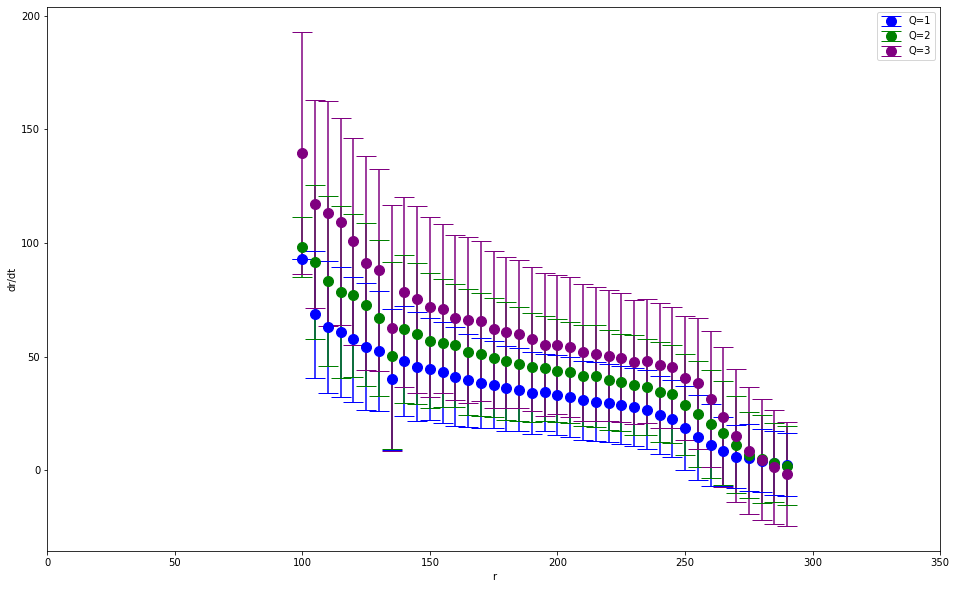

In [30]:
fig, ax = plt.subplots(figsize=(16, 10))
plt.xlabel("r")
plt.ylabel("dr/dt")
plt.xlim(0, 350)

ax.errorbar(r_ur_urErr_1[:, 0]/10, r_ur_urErr_1[:, 1], yerr=r_ur_urErr_1[:, 2], capsize=10, fmt='o', markersize=10, ecolor='b', markeredgecolor="b", color='b', label="Q=1")
ax.errorbar(r_ur_urErr_2[:, 0]/10, r_ur_urErr_2[:, 1], yerr=r_ur_urErr_2[:, 2], capsize=10, fmt='o', markersize=10, ecolor='g', markeredgecolor="g", color='g', label="Q=2")
ax.errorbar(r_ur_urErr_3[:, 0]/10, r_ur_urErr_3[:, 1], yerr=r_ur_urErr_3[:, 2], capsize=10, fmt='o', markersize=10, ecolor='purple', markeredgecolor="purple", color='purple', label="Q=3")

plt.legend()

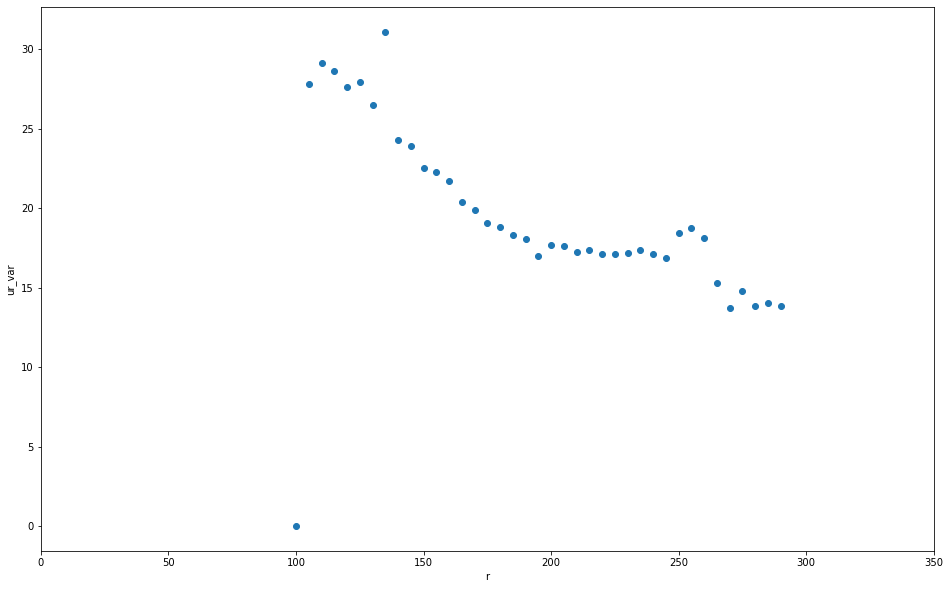

In [31]:
fig, ax = plt.subplots(figsize=(16, 10))
plt.xlabel("r")
plt.ylabel("ur_var")
plt.xlim(0, 350)
ax.scatter(r_ur_urErr_1[:, 0]/10, r_ur_urErr_1[:, 2])

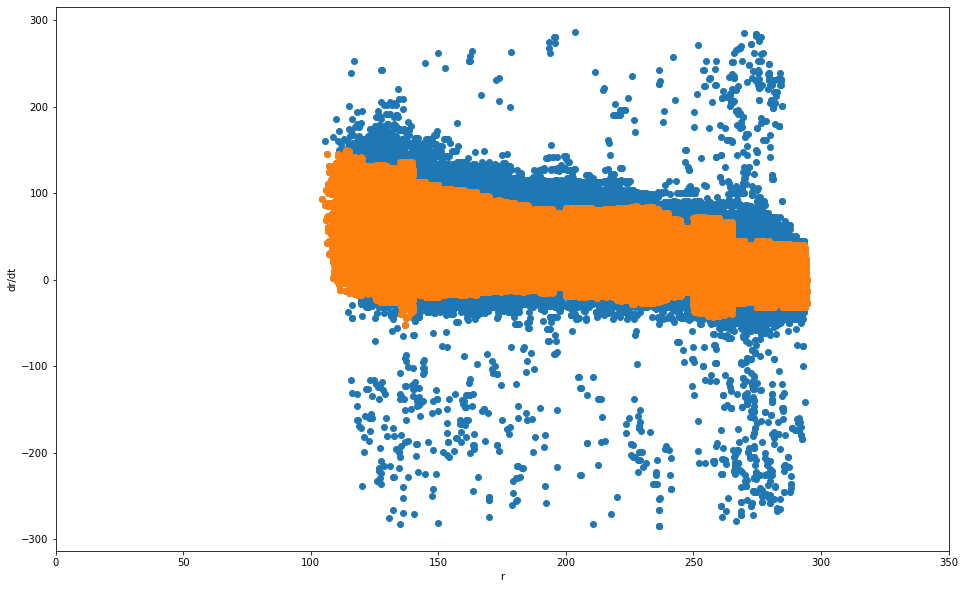

In [32]:
fig, ax = plt.subplots(figsize=(16, 10))
plt.xlabel("r")
plt.ylabel("dr/dt")
plt.xlim(0, 350)
ax.scatter(res1[:, 0], res1[:, 2], alpha=1, zorder=1)
ax.scatter(r_ur_in_1[:, 0], r_ur_in_1[:, 1], alpha=1, zorder=2)
plt.show()

In [36]:
with open('res1.pickle', mode='wb') as fp:
    pickle.dump(res1, fp)

with open('res2.pickle', mode='wb') as fp:
    pickle.dump(res2, fp)

with open('res3.pickle', mode='wb') as fp:
    pickle.dump(res3, fp)

In [37]:
with open('r_ur_urErr_1.pickle', mode='wb') as fp:
    pickle.dump(r_ur_urErr_1, fp)

with open('r_ur_urErr_2.pickle', mode='wb') as fp:
    pickle.dump(r_ur_urErr_2, fp)

with open('r_ur_urErr_3.pickle', mode='wb') as fp:
    pickle.dump(r_ur_urErr_3, fp)

In [38]:
with open('r_ur_in_1.pickle', mode='wb') as fp:
    pickle.dump(r_ur_in_1, fp)

with open('r_ur_in_2.pickle', mode='wb') as fp:
    pickle.dump(r_ur_in_2, fp)

with open('r_ur_in_3.pickle', mode='wb') as fp:
    pickle.dump(r_ur_in_3, fp)